# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

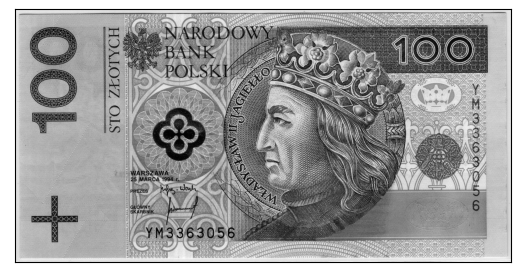

In [2]:
img = cv2.imread('100zloty.jpg', 0)
plt.xticks([]), plt.yticks([])
plt.gray()
plt.imshow(img)

In [3]:
import numpy as np

lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) 

eight_bit_img = np.array([int(i[0]) for i in lst],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
seven_bit_img = np.array([int(i[1]) for i in lst],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
six_bit_img = np.array([int(i[2]) for i in lst],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
five_bit_img = np.array([int(i[3]) for i in lst],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
four_bit_img = np.array([int(i[4]) for i in lst],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
three_bit_img = np.array([int(i[5]) for i in lst],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
two_bit_img = np.array([int(i[6]) for i in lst],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
one_bit_img = np.array([int(i[7]) for i in lst],dtype = np.uint8).reshape(img.shape[0],img.shape[1])

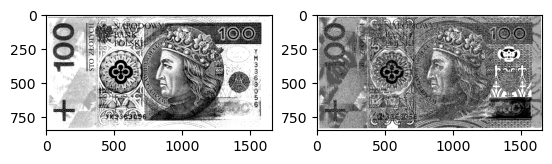

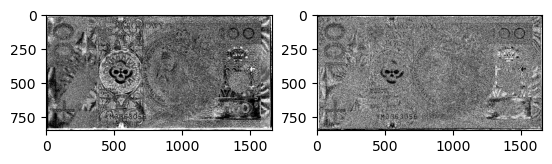

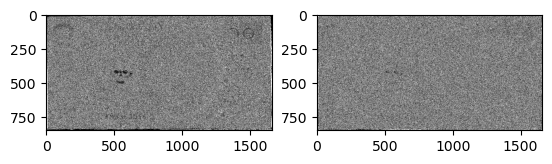

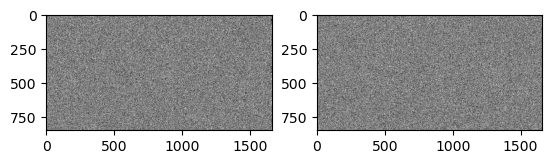

In [4]:
f1, (ax1,ax2) = plt.subplots(1,2)
f2, (ax3,ax4) = plt.subplots(1,2)
f3, (ax5,ax6) = plt.subplots(1,2)
f4, (ax7,ax8) = plt.subplots(1,2)

ax1.imshow(eight_bit_img)
ax2.imshow(seven_bit_img)
ax3.imshow(six_bit_img)
ax4.imshow(five_bit_img)
ax5.imshow(four_bit_img)
ax6.imshow(three_bit_img)
ax7.imshow(two_bit_img)
ax8.imshow(one_bit_img)

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

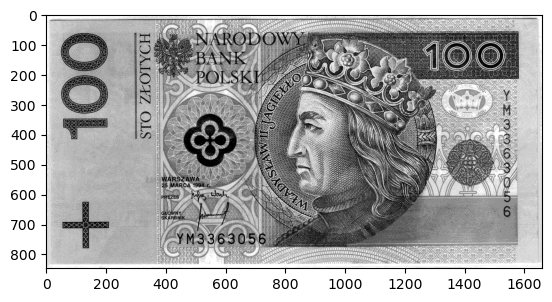

In [5]:
new_img1 = eight_bit_img * 128 + seven_bit_img * 64 + six_bit_img * 32
plt.imshow(new_img1)

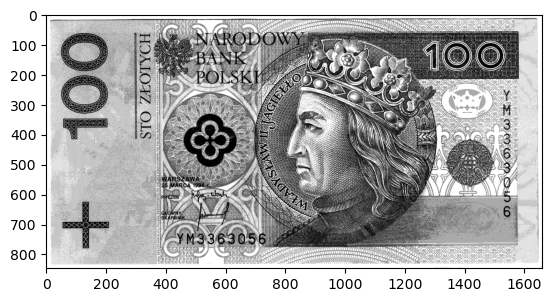

In [6]:
new_img2 = eight_bit_img * 128 + seven_bit_img * 64 + one_bit_img
plt.imshow(new_img2)

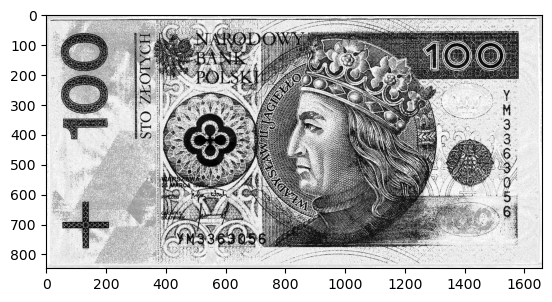

In [7]:
new_img3 = eight_bit_img * 128 + five_bit_img * 16 + four_bit_img * 8
plt.imshow(new_img3)

### In color version

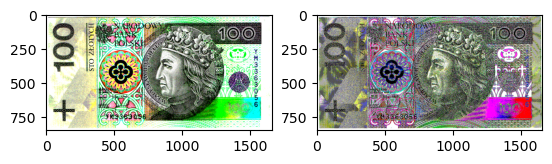

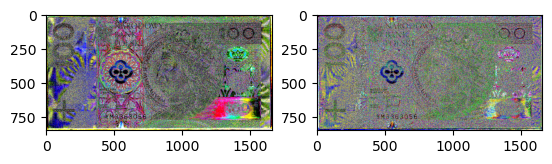

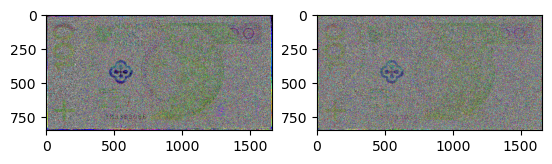

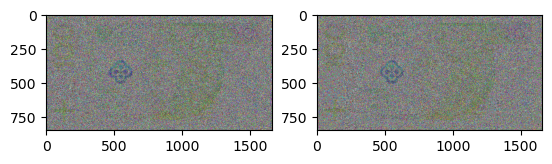

In [23]:
#https://www.theprogrammingcodeswarehouse.com/2020/04/implementation-of-bit-plane-slicing-in.html

from matplotlib import pyplot as plt3

img2 = cv2.imread('100zloty.jpg')
imgs = [255 * ((img2 & (1<<i)) >>i )for i in range(8)]


eight_bit_img_ = imgs[7]/255
seven_bit_img_ = imgs[6]/255
six_bit_img_ = imgs[5]/255
five_bit_img_ = imgs[4]/255
four_bit_img_ = imgs[3]/255
three_bit_img_ = imgs[2]/255
two_bit_img_ = imgs[1]/255
one_bit_img_ = imgs[0]/255

f1, (ax1,ax2) = plt.subplots(1,2)
f2, (ax3,ax4) = plt.subplots(1,2)
f3, (ax5,ax6) = plt.subplots(1,2)
f4, (ax7,ax8) = plt.subplots(1,2)

ax1.imshow(eight_bit_img_)
ax2.imshow(seven_bit_img_)
ax3.imshow(six_bit_img_)
ax4.imshow(five_bit_img_)
ax5.imshow(four_bit_img_)
ax6.imshow(three_bit_img_)
ax7.imshow(two_bit_img_)
ax8.imshow(one_bit_img_)

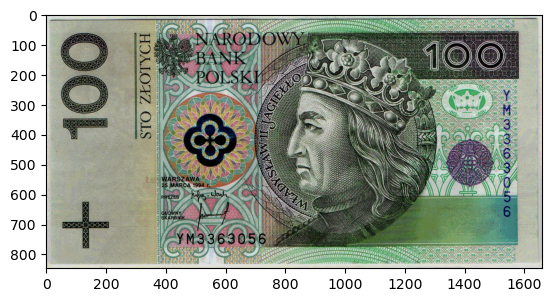

In [24]:
new_img1_ = (eight_bit_img_ * 128 + seven_bit_img_ * 64 + six_bit_img_ * 32)/255
plt.imshow(new_img1_)

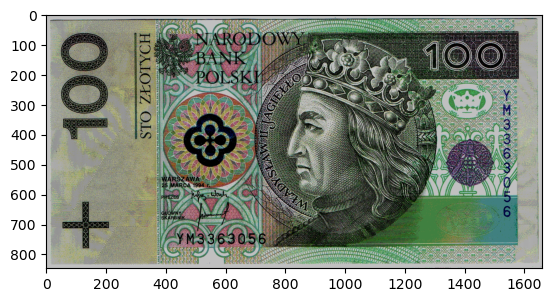

In [26]:
new_img2_ = (eight_bit_img_ * 128 + seven_bit_img_ * 64 + one_bit_img_)/255
plt.imshow(new_img2_)

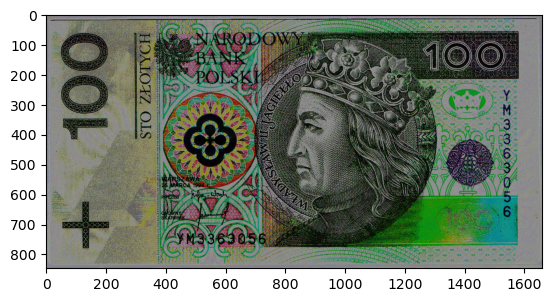

In [27]:
new_img3_ = (eight_bit_img_ * 128 + five_bit_img_ * 16 + four_bit_img_ * 8)/255
plt.imshow(new_img3_)